In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

In [ ]:
item_category = pd.read_csv("/content/annex1.csv")
sales = pd.read_csv("/content/annex2.csv")
wholesales = pd.read_csv("/content/annex3.csv")
loss_rate = pd.read_csv("/content/annex4.csv")

In [ ]:
item_category.head()

,Item Code,Item Name,Category Code,Category Name
0,102900005115168,Niushou Shengcai,1011010101,Flower/Leaf Vegetables
1,102900005115199,Sichuan Red Cedar,1011010101,Flower/Leaf Vegetables
2,102900005115625,Local Xiaomao Cabbage,1011010101,Flower/Leaf Vegetables
3,102900005115748,White Caitai,1011010101,Flower/Leaf Vegetables
4,102900005115762,Amaranth,1011010101,Flower/Leaf Vegetables


In [ ]:
print("Checking the rows and columns, Rows={}, Columns={}".format(item_category.shape[0], item_category.shape[1]))

print(item_category.nunique())

Checking the rows and columns, Rows=251, Columns=4
Item Code        251
Item Name        247
Category Code      6
Category Name      6
dtype: int64


In [ ]:
item_category["Category Name"].unique()

array(['Flower/Leaf\xa0Vegetables', 'Cabbage',
       'Aquatic Tuberous Vegetables', 'Solanum', 'Capsicum',
       'Edible Mushroom'], dtype=object)

In [ ]:
item_category.isnull().sum()

Item Code        0
Item Name        0
Category Code    0
Category Name    0
dtype: int64

In [ ]:
item_category.duplicated().sum()

0

In [ ]:
# finding the unique elements from all columns
for i in item_category.columns:
  print(item_category[i].unique())

[102900005115168 102900005115199 102900005115625 102900005115748
 102900005115762 102900005115779 102900005115786 102900005115793
 102900005115816 102900005115823 102900005115854 102900005115861
 102900005115878 102900005115885 102900005115908 102900005115946
 102900005115960 102900005115977 102900005115984 102900005116639
 102900005116776 102900005116790 102900005116806 102900005118572
 102900005118817 102900005118831 102900005119975 102900005122654
 102900005128748 102900011000175 102900011000571 102900011002414
 102900011006689 102900011006948 102900011006955 102900011007464
 102900011007471 102900011007495 102900011008133 102900011008164
 102900011008485 102900011008492 102900011008515 102900011008522
 102900011008676 102900011015384 102900011015391 102900011021644
 102900011022849 102900011022924 102900011023464 102900011026502
 102900011026618 102900011027462 102900011027615 102900011029688
 102900011030042 102900011030059 102900011030097 102900011030103
 102900011030110 10290001

In [ ]:
item_category.dtypes

Item Code         int64
Item Name        object
Category Code     int64
Category Name    object
dtype: object

In [ ]:
item_category.describe().astype(int)

,Item Code,Category Code
count,251,251
mean,103190825064436,1011010414
std,1048400107277,291
min,102900005115168,1011010101
25%,102900011001626,1011010101
50%,102900011029275,1011010501
75%,102900011033746,1011010801
max,106973990980123,1011010801


In [ ]:
sales.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No


In [ ]:
sales.dtypes

Date                            object
Time                            object
Item Code                      float64
Quantity Sold (kilo)           float64
Unit Selling Price (RMB/kg)    float64
Sale or Return                  object
Discount (Yes/No)               object
dtype: object

In [ ]:
sales["Date"]=pd.to_datetime(sales["Date"])

In [ ]:
sales.dtypes

Date                           datetime64[ns]
Time                                   object
Item Code                             float64
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
dtype: object

In [ ]:
sales.isnull().sum()

Date                           0
Time                           0
Item Code                      1
Quantity Sold (kilo)           1
Unit Selling Price (RMB/kg)    1
Sale or Return                 1
Discount (Yes/No)              1
dtype: int64

In [ ]:
sales.duplicated().sum()

0

In [ ]:
print("Checking the rows and columns, Rows={}, Columns={}".format(sales.shape[0], sales.shape[1]))
print(sales.nunique())

Checking the rows and columns, Rows=35320, Columns=7
Date                              33
Time                           35247
Item Code                         50
Quantity Sold (kilo)            1101
Unit Selling Price (RMB/kg)      206
Sale or Return                     2
Discount (Yes/No)                  2
dtype: int64


In [ ]:
sales.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No


In [ ]:
wholesales.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [ ]:
wholesales.isnull().sum()

Date                        0
Item Code                   0
Wholesale Price (RMB/kg)    0
dtype: int64

In [ ]:
wholesales["Date"]=pd.to_datetime(wholesales["Date"])

In [ ]:
wholesales.dtypes

Date                        datetime64[ns]
Item Code                            int64
Wholesale Price (RMB/kg)           float64
dtype: object

In [ ]:
print("Checking the rows and columns, Rows={}, Columns={}".format(wholesales.shape[0], wholesales.shape[1]))
print(wholesales.nunique())

Checking the rows and columns, Rows=55982, Columns=3
Date                        1091
Item Code                    251
Wholesale Price (RMB/kg)    2380
dtype: int64


In [ ]:
wholesales.duplicated().sum()

0

In [ ]:
for i in wholesales.columns:
  print(wholesales[i].unique())

<DatetimeArray>
['2020-07-01 00:00:00', '2020-07-02 00:00:00', '2020-07-03 00:00:00',
 '2020-07-04 00:00:00', '2020-07-05 00:00:00', '2020-07-06 00:00:00',
 '2020-07-07 00:00:00', '2020-07-08 00:00:00', '2020-07-09 00:00:00',
 '2020-07-10 00:00:00',
 ...
 '2023-06-21 00:00:00', '2023-06-22 00:00:00', '2023-06-23 00:00:00',
 '2023-06-24 00:00:00', '2023-06-25 00:00:00', '2023-06-26 00:00:00',
 '2023-06-27 00:00:00', '2023-06-28 00:00:00', '2023-06-29 00:00:00',
 '2023-06-30 00:00:00']
Length: 1091, dtype: datetime64[ns]
[102900005115762 102900005115779 102900005115786 102900005115793
 102900005115823 102900005115908 102900005115946 102900005115960
 102900005115984 102900005116226 102900005116233 102900005116257
 102900005116509 102900005116530 102900005116547 102900005116714
 102900005116790 102900005116912 102900005116943 102900005117056
 102900005117209 102900005118817 102900005118824 102900005118831
 102900005119944 102900005119975 102900005123880 102900005125808
 102900005125815 102

In [ ]:
"""wholesales.describe().astype(int)"""

'wholesales.describe().astype(int)'

In [ ]:
loss_rate.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [ ]:
loss_rate.dtypes

Item Code          int64
Item Name         object
Loss Rate (%)    float64
dtype: object

In [ ]:
loss_rate.isnull().sum()

Item Code        0
Item Name        0
Loss Rate (%)    0
dtype: int64

In [ ]:
loss_rate.describe().astype(int)

,Item Code,Loss Rate (%)
count,251,251
mean,103190825064436,9
std,1048400107277,5
min,102900005115168,0
25%,102900011001626,8
50%,102900011029275,9
75%,102900011033746,11
max,106973990980123,29


### Merging/combing the data

In [ ]:
sales.head(2)

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No)
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No


In [ ]:
sales.dtypes

Date                           datetime64[ns]
Time                                   object
Item Code                             float64
Quantity Sold (kilo)                  float64
Unit Selling Price (RMB/kg)           float64
Sale or Return                         object
Discount (Yes/No)                      object
dtype: object

In [ ]:
sales_wholesales_combine_data = pd.merge(sales,wholesales,how="left",on=["Item Code","Date"])
sales_wholesales_combine_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg)
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No,4.32
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No,2.10
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No,4.32
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No,7.03
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No,4.60


In [ ]:
sales_wholesales_category = pd.merge(sales_wholesales_combine_data,item_category,how="left",on="Item Code")
sales_wholesales_category.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No,2.10,Chinese Cabbage,1.011010e+09,Flower/Leaf Vegetables
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No,7.03,Shanghaiqing,1.011010e+09,Flower/Leaf Vegetables
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No,4.60,Caixin,1.011010e+09,Flower/Leaf Vegetables


In [ ]:
final_data = pd.merge(sales_wholesales_category,loss_rate,how="left",on=["Item Code","Item Name"])
final_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%)
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No,2.10,Chinese Cabbage,1.011010e+09,Flower/Leaf Vegetables,22.27
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No,7.03,Shanghaiqing,1.011010e+09,Flower/Leaf Vegetables,14.43
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No,4.60,Caixin,1.011010e+09,Flower/Leaf Vegetables,13.70


In [ ]:
final_data.columns

Index(['Date', 'Time', 'Item Code', 'Quantity Sold (kilo)',
       'Unit Selling Price (RMB/kg)', 'Sale or Return', 'Discount (Yes/No)',
       'Wholesale Price (RMB/kg)', 'Item Name', 'Category Code',
       'Category Name', 'Loss Rate (%)'],
      dtype='object')

In [ ]:
final_data["total_sales"]=final_data["Quantity Sold (kilo)"]*final_data["Unit Selling Price (RMB/kg)"]

In [ ]:
final_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%),total_sales
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08,3.0096
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No,2.10,Chinese Cabbage,1.011010e+09,Flower/Leaf Vegetables,22.27,2.7168
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08,3.1084
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No,7.03,Shanghaiqing,1.011010e+09,Flower/Leaf Vegetables,14.43,4.2100
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No,4.60,Caixin,1.011010e+09,Flower/Leaf Vegetables,13.70,4.3120


In [ ]:
final_data["Item Name"].nunique()
final_data["Category Name"].nunique()

6

### Charts

In [ ]:
# make a group of category name and check the total sales done by categoryi
category_name_wise_sales = final_data.groupby(["Category Name"])["total_sales"].sum().astype(int).reset_index()
#category_name_wise_sales["total_sales"]=category_name_wise_sales["total_sales"].astype(int)

In [ ]:
category_name_wise_sales

,Category Name,total_sales
0,Aquatic Tuberous Vegetables,5000
1,Cabbage,17388
2,Capsicum,24346
3,Edible Mushroom,20373
4,Flower/Leaf Vegetables,51728
5,Solanum,10048


In [ ]:
sorted = category_name_wise_sales.sort_values(by='total_sales', ascending = False)
sorted

,Category Name,total_sales
4,Flower/Leaf Vegetables,51728
2,Capsicum,24346
3,Edible Mushroom,20373
1,Cabbage,17388
5,Solanum,10048
0,Aquatic Tuberous Vegetables,5000


In [ ]:
#DataFrame.where(): This method replaces values where the condition is False.
import numpy as np
import pandas as pd

data = {'Value': [10, 20, 30, 40]}
df = pd.DataFrame(data)

# Replace values less than 20 with NaN
modified_df = df.where(df['Value'] >= 20, other=np.nan)

print(modified_df)

   Value
0    NaN
1   20.0
2   30.0
3   40.0


In [ ]:
final_data.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%),total_sales
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08,3.0096
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No,2.10,Chinese Cabbage,1.011010e+09,Flower/Leaf Vegetables,22.27,2.7168
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08,3.1084
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No,7.03,Shanghaiqing,1.011010e+09,Flower/Leaf Vegetables,14.43,4.2100
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No,4.60,Caixin,1.011010e+09,Flower/Leaf Vegetables,13.70,4.3120


In [ ]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35320 entries, 0 to 35319
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         35320 non-null  datetime64[ns]
 1   Time                         35320 non-null  object        
 2   Item Code                    35319 non-null  float64       
 3   Quantity Sold (kilo)         35319 non-null  float64       
 4   Unit Selling Price (RMB/kg)  35319 non-null  float64       
 5   Sale or Return               35319 non-null  object        
 6   Discount (Yes/No)            35319 non-null  object        
 7   Wholesale Price (RMB/kg)     35319 non-null  float64       
 8   Item Name                    35319 non-null  object        
 9   Category Code                35319 non-null  float64       
 10  Category Name                35319 non-null  object        
 11  Loss Rate (%)                35319 non-nu

In [ ]:
final_data = final_data.dropna(subset=['total_sales'])

In [ ]:
final_data['total_sales'].fillna(0, inplace=True)

<ipython-input-49-1eddea80d551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['total_sales'].fillna(0, inplace=True)


In [ ]:
final_data['total_sales'] = final_data['total_sales'].astype(int)

<ipython-input-50-68944c7d662a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['total_sales'] = final_data['total_sales'].astype(int)


In [ ]:
sale_return = final_data.pivot_table(index='Sale or Return', values='total_sales', aggfunc='sum')
sale_return

,total_sales
Sale or Return,
return,-192
sale,112438


In [ ]:
renamed_df = final_data.rename(columns={'Item Code': 'Item_Code'})
renamed_df.head()

,Date,Time,Item_Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Wholesale Price (RMB/kg),Item Name,Category Code,Category Name,Loss Rate (%),total_sales
0,2020-07-01,09:15:07.924,1.029000e+14,0.396,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08,3
1,2020-07-01,09:17:27.295,1.029000e+14,0.849,3.2,sale,No,2.10,Chinese Cabbage,1.011010e+09,Flower/Leaf Vegetables,22.27,2
2,2020-07-01,09:17:33.905,1.029000e+14,0.409,7.6,sale,No,4.32,Paopaojiao (Jingpin),1.011011e+09,Capsicum,7.08,3
3,2020-07-01,09:19:45.450,1.029000e+14,0.421,10.0,sale,No,7.03,Shanghaiqing,1.011010e+09,Flower/Leaf Vegetables,14.43,4
4,2020-07-01,09:20:23.686,1.029000e+14,0.539,8.0,sale,No,4.60,Caixin,1.011010e+09,Flower/Leaf Vegetables,13.70,4


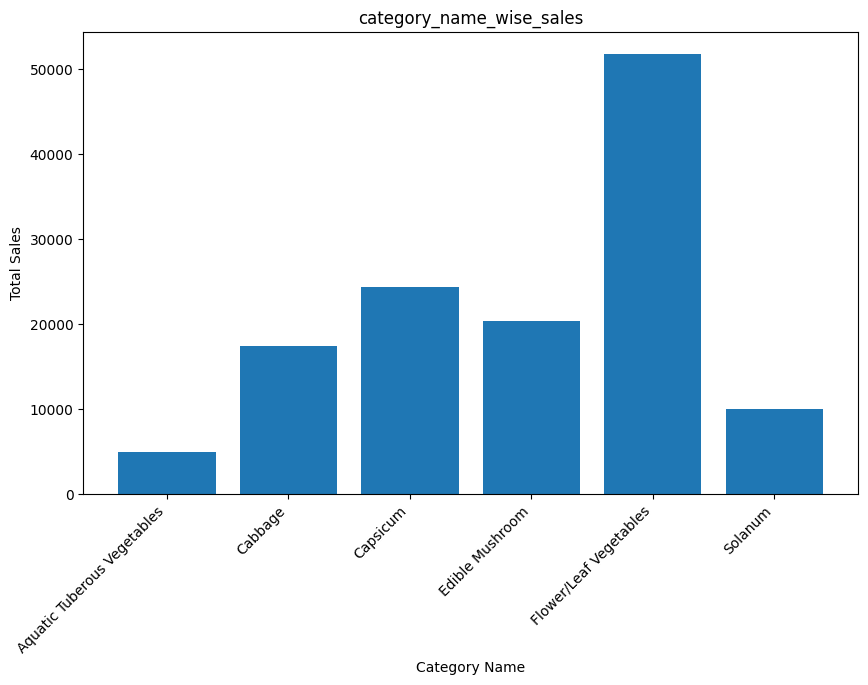

In [ ]:
# Matplotlib bar chart
plt.figure(figsize=(10, 6))
plt.bar(category_name_wise_sales['Category Name'], category_name_wise_sales['total_sales'])
plt.xlabel('Category Name')
plt.ylabel('Total Sales')
plt.title('category_name_wise_sales')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
fig = px.bar(category_name_wise_sales, x='Category Name', y='total_sales', title='category_name_wise_sales')
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

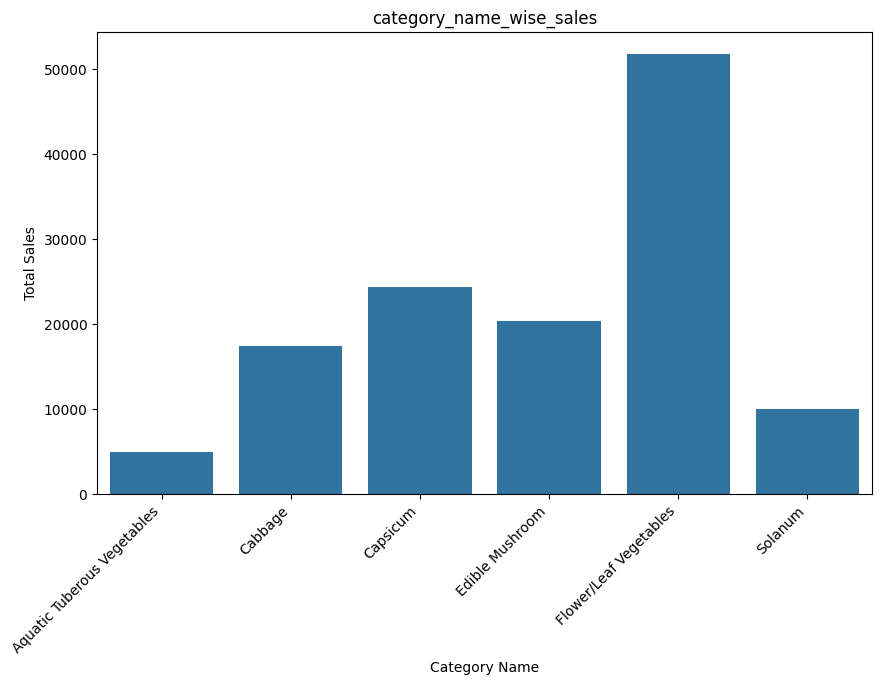

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Category Name', y='total_sales', data=category_name_wise_sales)
plt.xlabel('Category Name')
plt.ylabel('Total Sales')
plt.title('category_name_wise_sales')
plt.xticks(rotation=45, ha='right')
plt.show()

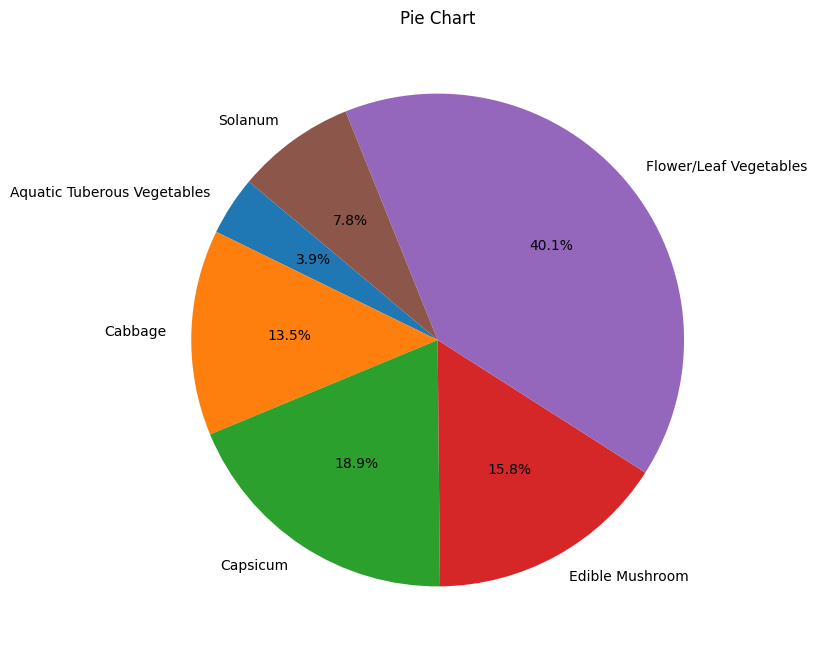

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_name_wise_sales['total_sales'], labels=category_name_wise_sales['Category Name'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart')
plt.show()

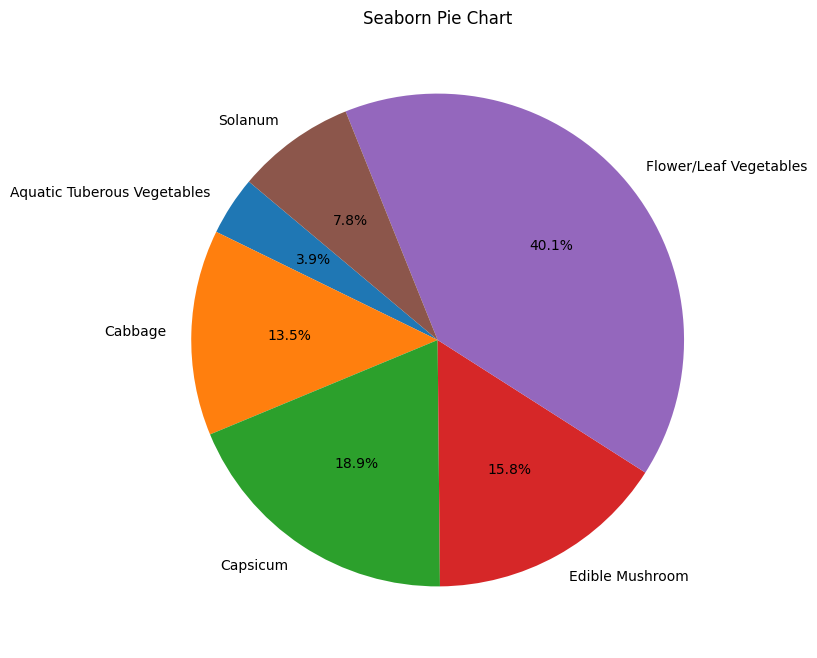

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(category_name_wise_sales['total_sales'], labels=category_name_wise_sales['Category Name'], autopct='%1.1f%%', startangle=140)
plt.title('Seaborn Pie Chart')
plt.show()

In [ ]:
fig1 = px.pie(category_name_wise_sales, values='total_sales', names='Category Name', title='Plotly Pie Chart')
fig1.show()

In [ ]:
sales_trend = final_data.groupby(final_data['Date'].dt.year.astype("str"))['total_sales'].sum().reset_index()
sales_trend

,Date,total_sales
0,2020,112246


In [ ]:
sales_trend['total_sales'] = sales_trend['total_sales'].round(2)
sales_trend

,Date,total_sales
0,2020,112246


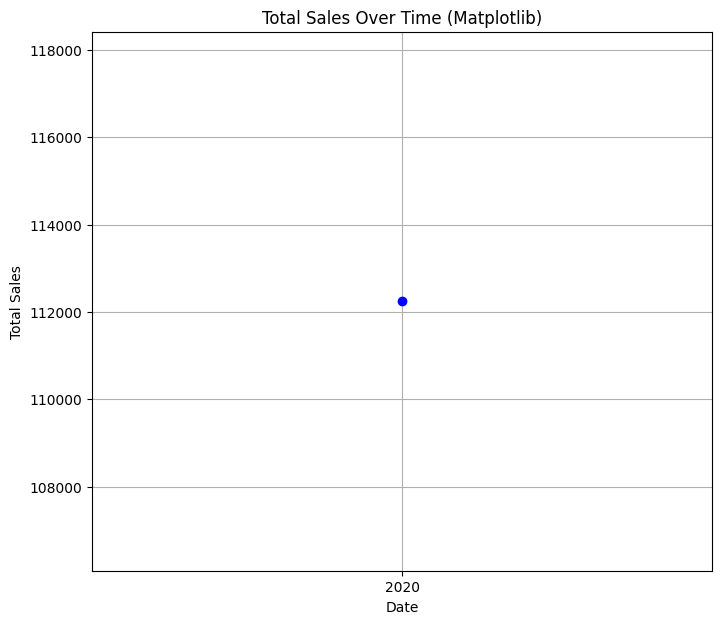

In [ ]:
plt.figure(figsize=(8, 7))
plt.plot(sales_trend['Date'], sales_trend['total_sales'], marker='o', linestyle='-', color='b')
plt.title('Total Sales Over Time (Matplotlib)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
# Create a trace
trace = go.Scatter(
    x=sales_trend['Date'],
    y=sales_trend['total_sales'],
    mode='lines+markers',
    marker=dict(color='blue'),
    line=dict(color='blue', width=2),
)

# Create layout
layout = go.Layout(
    title='Total sales Over Time (Plotly)',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Total Sales'),
    showlegend=False,
    hovermode='closest',
    plot_bgcolor='rgba(0, 0, 0, 0)',
    width=1200,
    height=600
)

# Create figure and add trace
fig = go.Figure(data=[trace], layout=layout)

# Show plot
fig.show()


In [ ]:
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 20]}
df = pd.DataFrame(data)

# Transpose the DataFrame
transposed_df = df.transpose()

print(transposed_df)

          0    1        2
Name  Alice  Bob  Charlie
Age      25   30       20


In [ ]:
# Load your data into a Pandas DataFrame
category_name_wise_sales = pd.DataFrame({
    'year': [2018, 2019, 2020, 2021, 2022],
    'total_sales': [100, 150, 200, 250, 300]
})

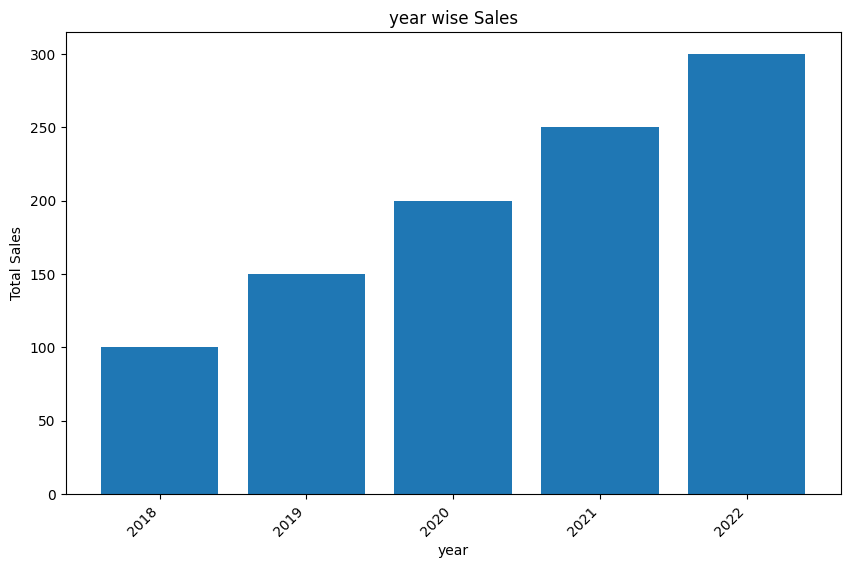

In [ ]:
import matplotlib.pyplot as plt

# Replace "category_name_wise_sales" with your actual data frame name
plt.figure(figsize=(10, 6))
plt.bar(category_name_wise_sales['year'], category_name_wise_sales['total_sales'])
plt.xlabel('year')
plt.ylabel('Total Sales')
plt.title('year wise Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

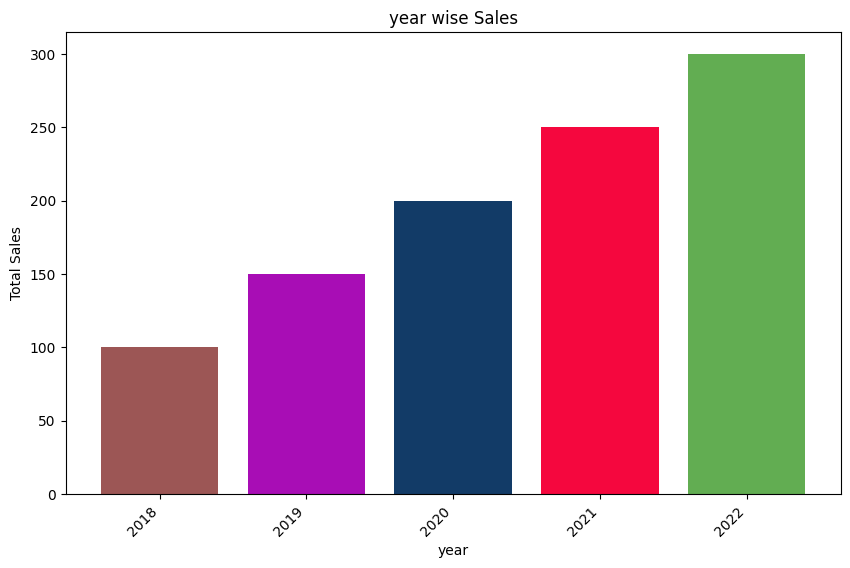

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 6))
num_bars = len(category_name_wise_sales['year'])
colors = np.random.rand(num_bars, 3)
plt.bar(category_name_wise_sales['year'], category_name_wise_sales['total_sales'], color=colors)
plt.xlabel('year')
plt.ylabel('Total Sales')
plt.title('year wise Sales')
plt.xticks(rotation=45, ha='right')
plt.show()